In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings                    # uyarı mesajları almamak için 
warnings.filterwarnings("ignore")

In [91]:
df = pd.read_csv("forbes_2022_billionaires.csv")

In [92]:
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [93]:
df.shape         # satır, sütun sayısı

(2668, 22)

In [94]:
df.columns       # veri setindeki tüm sütunlar

Index(['rank', 'personName', 'age', 'finalWorth', 'year', 'month', 'category',
       'source', 'country', 'state', 'city', 'countryOfCitizenship',
       'organization', 'selfMade', 'gender', 'birthDate', 'title',
       'philanthropyScore', 'residenceMsa', 'numberOfSiblings', 'bio',
       'about'],
      dtype='object')

In [95]:
# Analiz için gerekli sütunları seçiyoruz

df = df.loc[:,["rank","personName","age","finalWorth","category","country","gender","title"]]

In [96]:
df.head()

,rank,personName,age,finalWorth,category,country,gender,title
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M,CEO
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M,Entrepreneur
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M,Chairman and CEO
3,4,Bill Gates,66.0,129000.0,Technology,United States,M,Cofounder
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M,CEO


In [98]:
# Sütun isimlerini türkçeye çevirelim

In [99]:
df = df.rename(columns = {"rank":"sıra", "personName":"isim", "age":"yaş", "finalWorth":"servet", 
                          "category":"kategori", "country":"ülke", "gender":"cinsiyet", "title":"ünvan"})

In [100]:
df.head()

,sıra,isim,yaş,servet,kategori,ülke,cinsiyet,ünvan
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M,CEO
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M,Entrepreneur
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M,Chairman and CEO
3,4,Bill Gates,66.0,129000.0,Technology,United States,M,Cofounder
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M,CEO


In [102]:
# sıra sütunu index ile aynı olduğu için onu index'e dönüştürüyoruz

In [103]:
df = df.set_index("sıra")

In [104]:
df.head()

,isim,yaş,servet,kategori,ülke,cinsiyet,ünvan
sıra,,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M,CEO
2,Jeff Bezos,58.0,171000.0,Technology,United States,M,Entrepreneur
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M,Chairman and CEO
4,Bill Gates,66.0,129000.0,Technology,United States,M,Cofounder
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M,CEO


In [105]:
df.dtypes                 # sütunlarımızda ki mevcur veri tipine bakalım 

isim         object
yaş         float64
servet      float64
kategori     object
ülke         object
cinsiyet     object
ünvan        object
dtype: object

#### Eksik verilerimize bakalım

In [106]:
df.isnull().sum()

isim           0
yaş           86
servet         0
kategori       0
ülke          13
cinsiyet      16
ünvan       2267
dtype: int64

In [107]:
df.ünvan.fillna("Billionair", inplace = True)    # bir kaç analiz için ünvanda eksik olan değerleri doldurduk

In [108]:
df.isnull().sum()

isim         0
yaş         86
servet       0
kategori     0
ülke        13
cinsiyet    16
ünvan        0
dtype: int64

In [109]:
df.dropna(inplace = True)         # geri kalan tüm eksik verileri siliyoruz

In [110]:
df.shape                          #  normalde (2668) iken (2568) düştü satır sayısı

(2568, 7)

#### Cinsiyet dağılımına bakalım

In [111]:
df["cinsiyet"].value_counts()

M    2282
F     286
Name: cinsiyet, dtype: int64

In [112]:
# bu sutundaki değerleri yüzdeyle görelim 
df["cinsiyet"].value_counts(normalize = True) * 100

M    88.862928
F    11.137072
Name: cinsiyet, dtype: float64

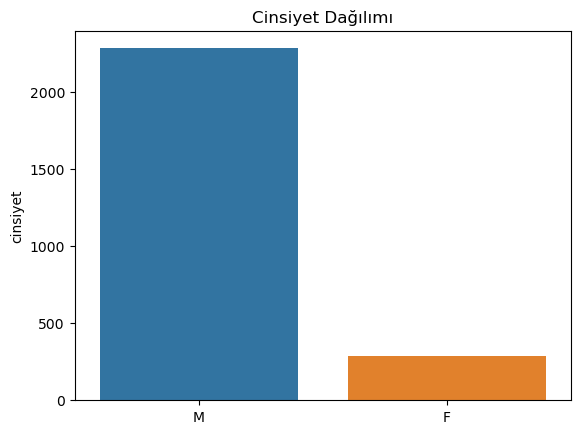

In [171]:
# plt.bar(df.cinsiyet.value_counts().index, df.cinsiyet.value_counts());    matplotlib ile barplot işlemi
sns.barplot(df.cinsiyet.value_counts().index, df.cinsiyet.value_counts());
plt.title("Cinsiyet Dağılımı")
plt.show()

In [139]:
 # listede Turkey geçen satır sayısı
len(df[df["ülke"]=="Turkey"])        

23

In [114]:
# türkiyede ki cinsiyetin yüzdelik durumu (filtreleme yaparak)
df[df["ülke"]=="Turkey"].cinsiyet.value_counts(normalize = True) * 100

M    82.608696
F    17.391304
Name: cinsiyet, dtype: float64

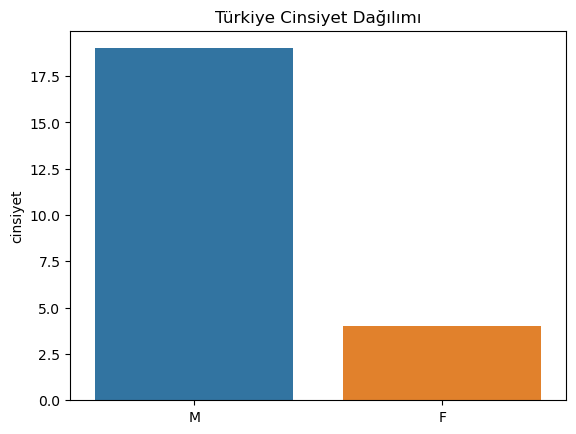

In [170]:
sns.barplot(df[df["ülke"]=="Turkey"].cinsiyet.value_counts().index, df[df["ülke"]=="Turkey"].cinsiyet.value_counts());
plt.title("Türkiye Cinsiyet Dağılımı")
plt.show()

In [115]:
# burdaki iki farklı çıktıdan türkiyedeki zengin kadın oranınının dünyadakinden biraz daha fazla olduğunu görüyoruz

In [117]:
# başka ülkelerede bakabiliriz ama öncelikle ülke sutununun unique değerlerine bakıp aradan seçebiliriz
df["ülke"].unique()

array(['United States', 'France', 'India', 'Mexico', 'China', 'Singapore',
       'Spain', 'Canada', 'Germany', 'Switzerland', 'Belgium',
       'Hong Kong', 'United Kingdom', 'Australia', 'Austria', 'Italy',
       'Japan', 'Bahamas', 'Indonesia', 'Chile', 'Russia', 'Sweden',
       'Czechia', 'Monaco', 'United Arab Emirates', 'Nigeria', 'Denmark',
       'Thailand', 'Malaysia', 'Brazil', 'Colombia', 'New Zealand',
       'South Korea', 'South Africa', 'Philippines', 'Egypt', 'Taiwan',
       'Israel', 'Vietnam', 'Poland', 'Norway', 'Cayman Islands',
       'Netherlands', 'Eswatini (Swaziland)', 'Peru', 'Algeria',
       'Kazakhstan', 'Georgia', 'Portugal', 'British Virgin Islands',
       'Turkey', 'Finland', 'Ukraine', 'Ireland', 'Bermuda', 'Lebanon',
       'Argentina', 'Cambodia', 'Oman', 'Guernsey', 'Liechtenstein',
       'Turks and Caicos Islands', 'Qatar', 'Morocco', 'Uruguay',
       'Slovakia', 'Romania', 'Nepal', 'Tanzania', 'Bahrain', 'Greece',
       'Hungary', 'Andorra']

In [119]:
df[df["ülke"]=="Canada"].cinsiyet.value_counts(normalize = True) * 100

M    95.238095
F     4.761905
Name: cinsiyet, dtype: float64

In [28]:
# zenginlerin cinsiyete göre yaş ortalamalarına bakalım

In [123]:
df.groupby("cinsiyet")["yaş"].mean()     # verisetini cinsiyete göre gruplamış olduk 

cinsiyet
F    62.937063
M    64.409290
Name: yaş, dtype: float64

#### yaş_aralığı isminde 4 farklı aralıktan oluşan yeni bir sütün oluşturalım 

In [205]:
df["yaş_aralığı"] = pd.cut(df["yaş"], bins = [20, 30, 50, 70, 100], labels = ['20-30', '30-50', '50-70','70+'])
df.head()

,isim,yaş,servet,kategori,ülke,cinsiyet,ünvan,yaş_aralığı
sıra,,,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M,CEO,30-50
2,Jeff Bezos,58.0,171000.0,Technology,United States,M,Entrepreneur,50-70
3,Bernard Arnault & family,73.0,158000.0,Fashion_Retail,France,M,Chairman and CEO,70+
4,Bill Gates,66.0,129000.0,Technology,United States,M,Cofounder,50-70
5,Warren Buffett,91.0,118000.0,Finance_Investments,United States,M,CEO,70+


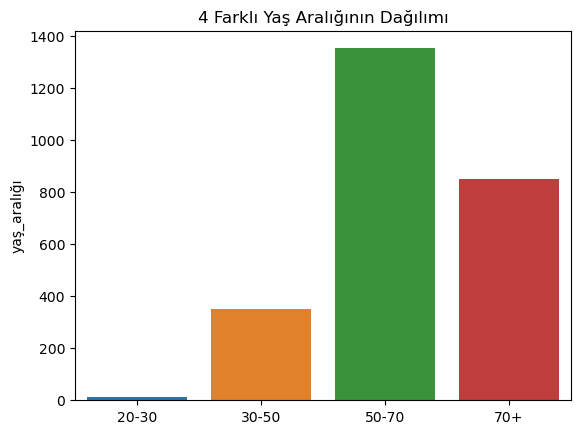

In [207]:
sns.barplot(df.yaş_aralığı.value_counts().index, df.yaş_aralığı.value_counts());
plt.title("4 Farklı Yaş Aralığının Dağılımı")
plt.show()

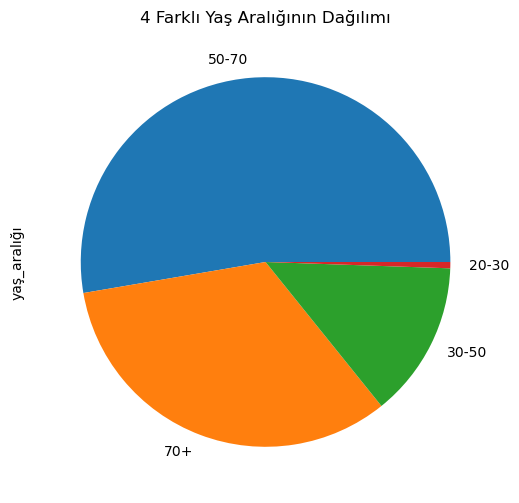

In [209]:
# Birde pasta grafiği ile yaş aralıklarının dağılımına bakalım
df["yaş_aralığı"].value_counts().plot(kind = 'pie', figsize = (6,6));
plt.title("4 Farklı Yaş Aralığının Dağılımı")
plt.show()

#### CEO ünvanı taşıyan kaç kişi var ve kimler 

In [145]:
# mevcut ünvanlar
df.ünvan.value_counts()

Billionair               2173
Entrepreneur               72
Investor                   43
Founder                    33
CEO                        29
                         ... 
CEO and Chairman            1
CEO, Fashion Designer       1
Senior Advisor              1
Honorary Chairman           1
Managing Director           1
Name: ünvan, Length: 95, dtype: int64

In [ ]:
# ünvan kısmında CEO geçenlere bakalım

In [147]:
CEO = df.loc[df['ünvan'].str.contains("CEO", case=False)]
CEO

,isim,yaş,servet,kategori,ülke,cinsiyet,ünvan
sıra,,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M,CEO
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M,Chairman and CEO
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M,CEO
12,Michael Bloomberg,80.0,82000.0,Media & Entertainment,United States,M,CEO
16,Jim Walton,73.0,66200.0,Fashion & Retail,United States,M,Chairman and CEO
...,...,...,...,...,...,...,...
2324,Lee Sang-ryul,60.0,1200.0,Manufacturing,South Korea,M,Co-CEO
2324,Leonard Schleifer,69.0,1200.0,Healthcare,United States,M,CEO and Founder
2448,Lloyd Blankfein,67.0,1100.0,Finance & Investments,United States,M,CEO


In [153]:
# veri setinde ki ünvanlar için de yer alan CEO'ların oranı
CEO.shape[0] / df.shape[0] * 100

3.348909657320872

#### Dünyanın en zengin ilk 20 kişinin grafiğini görelim

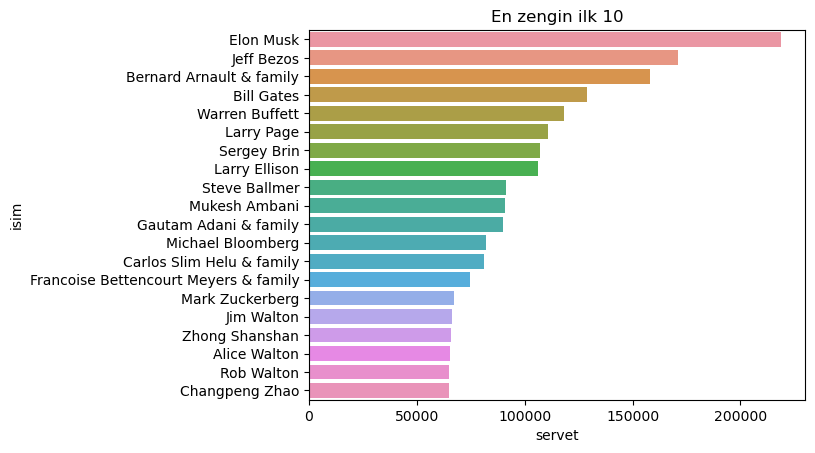

In [216]:
sns.barplot(y = df["isim"][:20], x = df["servet"][:20]);
plt.title("En zengin ilk 10")
plt.show()

#### En fazla milyarderin olduğu ülkeleri görelim

In [217]:
len(df["ülke"].unique())              # ülke sayılarını öğrenelim

73

In [218]:
df_ulke = df.groupby("ülke")          # ülkelere göre gruplama yapalım

In [222]:
type(df_ulke)

pandas.core.groupby.generic.DataFrameGroupBy

In [158]:
df_ulke_sayi = pd.DataFrame(df_ulke.size().sort_values(ascending = False), columns = ["sayı"])

In [159]:
df_ulke_sayi.head(10)

,sayı
ülke,
United States,742
China,546
India,154
Germany,94
United Kingdom,81
Switzerland,70
Hong Kong,66
Russia,65
Brazil,53


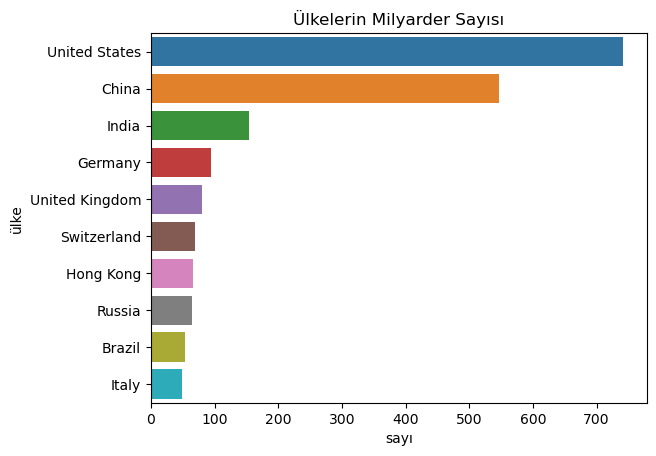

In [173]:
# ilk 10 ülkeye bakalım
sns.barplot(x = df_ulke_sayi["sayı"][:10], y = df_ulke_sayi.index[:10]);
plt.title("İlk 10 Ülkenin Milyarder Sayısı")
plt.show()

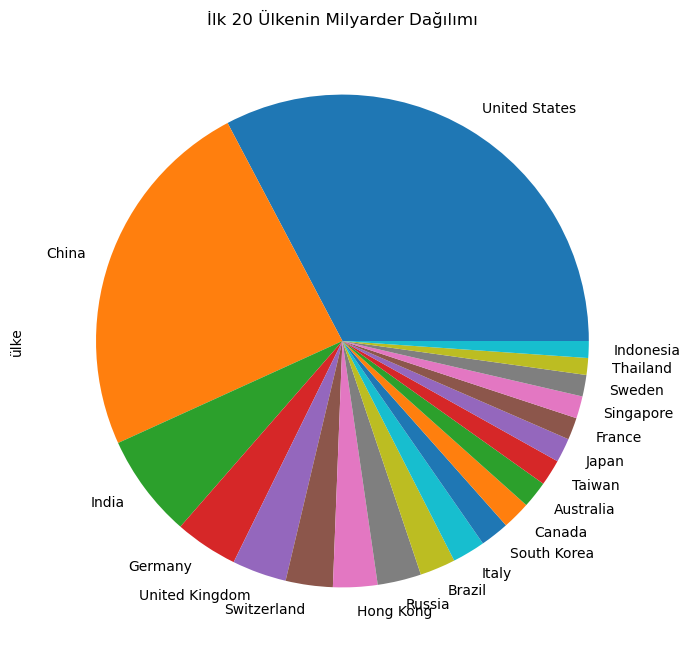

In [214]:
# Birde pasta grafiği ile ilk 20 ülkeyi gözlemleyelim
df["ülke"].value_counts().head(20).plot(kind = 'pie', figsize = (8,8));
plt.title("İlk 20 Ülkenin Milyarder Dağılımı")
plt.show()

#### Türkiyedeki en zenginleri bulalım

In [175]:
df_turkiye = df[df["ülke"]=="Turkey"]          # önce filtreleme işlemi yaptık türkiyeyi seçerek

In [176]:
df_turkiye["isim"].count()                      # listede türkiyeden kaç kişi var bulalım

23

In [177]:
df_turkiye.head(10)

,isim,yaş,servet,kategori,ülke,cinsiyet,ünvan
sıra,,,,,,,
601,Murat Ulker,63.0,4700.0,Food & Beverage,Turkey,M,Billionair
1292,Ferit Faik Sahenk,58.0,2400.0,Diversified,Turkey,M,Billionair
1341,Erman Ilicak,54.0,2300.0,Construction & Engineering,Turkey,M,Billionair
1397,Filiz Sahenk,55.0,2200.0,Diversified,Turkey,F,Billionair
1579,Sezai Bacaksiz,72.0,1900.0,Diversified,Turkey,M,Billionair
1579,Nihat Ozdemir,72.0,1900.0,Diversified,Turkey,M,Billionair
1645,Ibrahim Erdemoglu,59.0,1800.0,Manufacturing,Turkey,M,Billionair
1818,Semahat Sevim Arsel,93.0,1600.0,Diversified,Turkey,F,Billionair
1929,Hamdi Akin & family,67.0,1500.0,Diversified,Turkey,M,Billionair


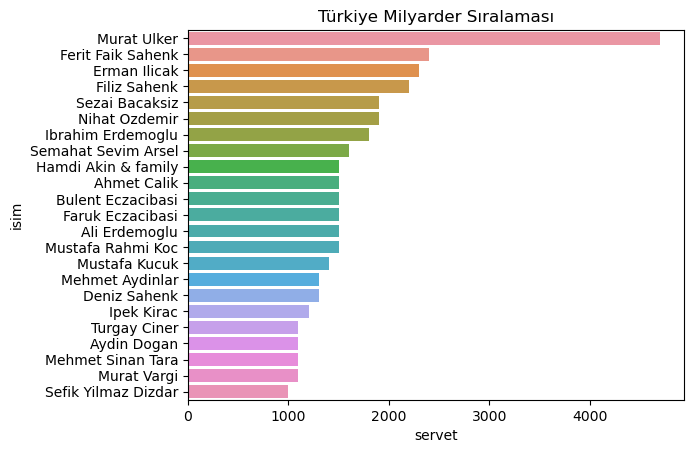

In [179]:
sns.barplot(y = df_turkiye["isim"], x = df_turkiye["servet"]);
plt.title("Türkiye Milyarder Sıralaması")
plt.show()

#### Ülkelere göre servet dağılımına bakalım

In [200]:
ulke_serveti = df.groupby(['ülke'])['servet'].sum().reset_index()
ulke_serveti = ulke_serveti.sort_values('servet', ascending= False)
print(ulke_serveti)

             ülke     servet
70  United States  4712800.0
15          China  2098850.0
29          India   694400.0
22         France   450400.0
24        Germany   425200.0
..            ...        ...
63       Tanzania     1500.0
42          Nepal     1500.0
6         Bahrain     1500.0
25         Greece     1400.0
1         Andorra     1300.0

[73 rows x 2 columns]


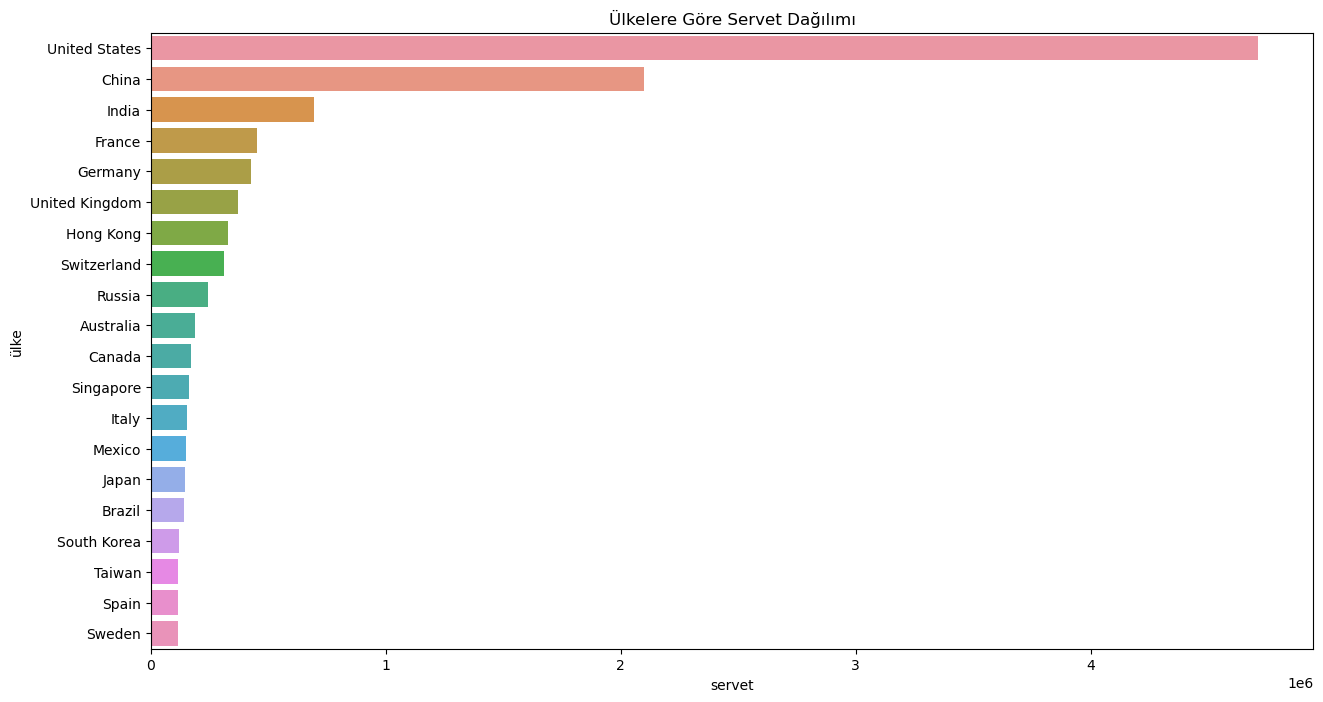

In [204]:
plt.figure(figsize = (15,8))
sns.barplot(x='servet', y = 'ülke', data = ulke_serveti.head(20));
plt.title("Ülkelere Göre Servet Dağılımı")
plt.show()

#### Milyarderler en fazla hangi alan da çalışıyor bulalım  

In [180]:
df["kategori"].unique()                 # değişkenlerdeki boşlukları ve ve sembolünü kaldıralım

array(['Automotive', 'Technology', 'Fashion & Retail',
       'Finance & Investments', 'Diversified', 'Media & Entertainment',
       'Telecom', 'Food & Beverage', 'Logistics', 'Real Estate',
       'Metals & Mining', 'Manufacturing', 'Gambling & Casinos',
       'Healthcare', 'Service', 'Energy', 'Construction & Engineering',
       'Sports'], dtype=object)

In [181]:
df["kategori"] = df["kategori"].apply(lambda x: x.replace(" ","")).apply(lambda x: x.replace("&","_"))

In [182]:
df["kategori"].unique()

array(['Automotive', 'Technology', 'Fashion_Retail',
       'Finance_Investments', 'Diversified', 'Media_Entertainment',
       'Telecom', 'Food_Beverage', 'Logistics', 'RealEstate',
       'Metals_Mining', 'Manufacturing', 'Gambling_Casinos', 'Healthcare',
       'Service', 'Energy', 'Construction_Engineering', 'Sports'],
      dtype=object)

In [223]:
df_kategori = df.groupby("kategori").size()

In [224]:
df_kategori.head()

kategori
Automotive                   66
Construction_Engineering     45
Diversified                 174
Energy                       93
Fashion_Retail              238
dtype: int64

In [185]:
df_kategori = df_kategori.to_frame()            # bu değişkeni dataframe yapısına dönüştürdük

In [186]:
df_kategori.head()

,0
kategori,
Automotive,66
Construction_Engineering,45
Diversified,174
Energy,93
Fashion_Retail,238


In [187]:
# sütun ismini değiştirdik ve veriyi sıraladık
df_kategori = df_kategori.rename(columns = {0:"sayi"}).sort_values(by = "sayi", ascending = False)

In [188]:
df_kategori.head()

,sayi
kategori,
Finance_Investments,381
Technology,332
Manufacturing,319
Fashion_Retail,238
Healthcare,209


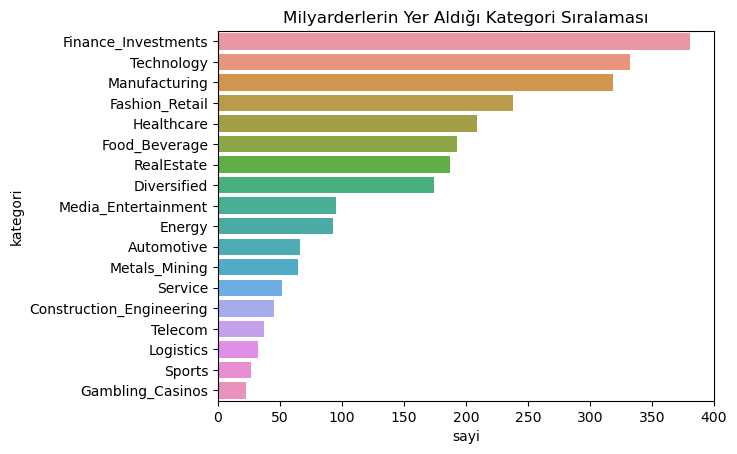

In [191]:
sns.barplot(df_kategori["sayi"], df_kategori.index);
plt.title("Milyarderlerin Yer Aldığı Kategori Sıralaması")
plt.show()

#### Yaş ile servet arasında ilişki var mı bakalım

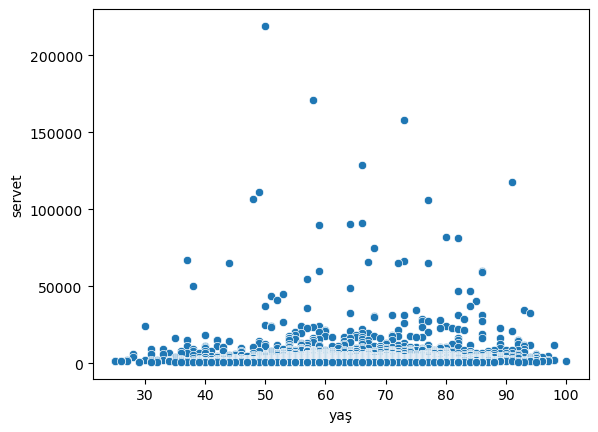

In [192]:
sns.scatterplot(df["yaş"],df["servet"]);

In [72]:
# bu grafikten değişkenler arasında bir ilişki olmadığını söyleyebiliriz

#### Milyarderlerin yaş dağılımlarına bakalım 

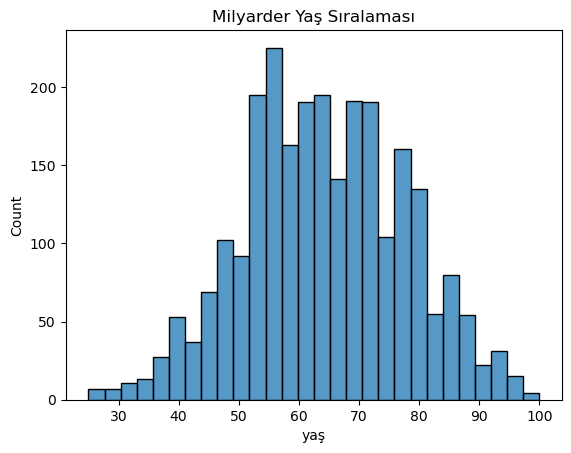

In [193]:
sns.histplot(df["yaş"]);
plt.title("Milyarder Yaş Sıralaması")
plt.show()

#### En genç milyarderleri bulalım

In [195]:
df_yas = df.sort_values(by = "yaş")
df_yas

,isim,yaş,servet,kategori,ülke,cinsiyet,ünvan
sıra,,,,,,,
2190,Alexandra Andresen,25.0,1300.0,Diversified,Norway,F,Billionair
1929,Wang Zelong,25.0,1500.0,Metals_Mining,China,M,Billionair
1929,Pedro Franceschi,25.0,1500.0,Finance_Investments,United States,M,Cofounder
1929,Henrique Dubugras,26.0,1500.0,Finance_Investments,United States,M,Cofounder
2190,Katharina Andresen,26.0,1300.0,Diversified,Norway,F,Billionair
...,...,...,...,...,...,...,...
1929,Ana Maria Brescia Cafferata,97.0,1500.0,Diversified,Peru,F,Billionair
163,Robert Kuok,98.0,11700.0,Diversified,Hong Kong,M,Billionair
1341,David Murdock,98.0,2300.0,Food_Beverage,United States,M,Billionair


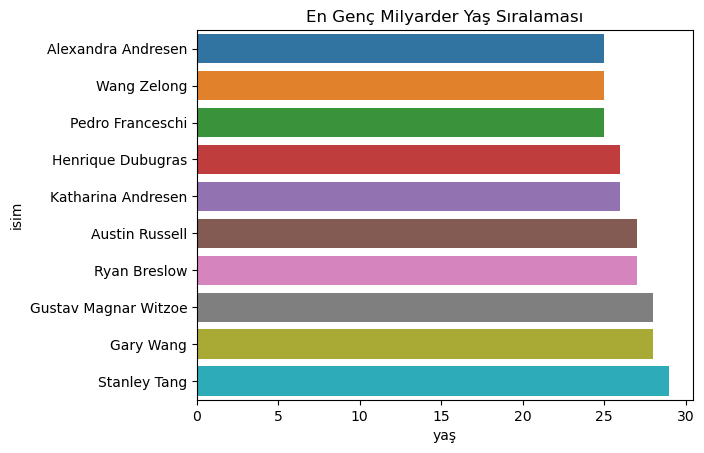

In [196]:
# En genç 10 kişinin grafiğini çizdirelim 
sns.barplot(y = df_yas["isim"][:10], x = df_yas["yaş"][:10]);
plt.title("En Genç Milyarder Yaş Sıralaması")
plt.show()